# Research On The Amount Of Recovered Gold

* Prepare a prototype of a machine learning model for Zyfra


* The company develops efficiency solutions for heavy industry.


* <b><font color='red'>The model should predict the amount of gold recovered from gold ore.</font></b>

    - You have the data on extraction and purification.
    - The model will help to optimize the production and eliminate unprofitable parameters   

<b><font color='red'>Data Description</font></b>

* The data is stored in three files:
   1. gold_recovery_train.csv — training dataset download
   2. gold_recovery_test.csv — test dataset download
   3. gold_recovery_full.csv — source dataset download


* Data is indexed with the date and time of acquisition (date feature). 


* Parameters that are next to each other in terms of time are often similar.


* Some parameters are not available because they were measured and/or calculated much later. 
  - That's why, some of the features that are present in the training set may be absent from the test set. 
  - The test set also doesn't contain targets.
  
  
* The source dataset contains the training and test sets with all the features.


* You have the raw data that was only downloaded from the warehouse. 

* Before building the model, check the correctness of the data. For that, use our instructions.

###### <font color='red'><u>Initialization - Import relevant libraries</u></font>

In [1]:
import pandas as pd
import nltk
import sklearn
import statistics
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Read data & Explore

<h3>Getting an overlook of the data</h3>

In [2]:
# upload the data files
gold_recv_train = pd.read_csv('datasets/gold_recovery_train.csv')
gold_recv_test = pd.read_csv('datasets/gold_recovery_test.csv')
gold_recv_full = pd.read_csv('datasets/gold_recovery_full.csv')

In [3]:
#Getting info about size of the data, attributes, data types 
gold_recv_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
#Getting 5 random entries in order to get an overall look of the data we are going to work with of the regions
gold_recv_train.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12672,2018-02-24 23:59:59,6.242152,9.522092,8.517154,43.329030,76.749307,12.035224,1.864660,11.915788,2.248143,...,19.990481,-493.076500,14.977713,-499.212455,10.941428,-499.287739,8.990692,-499.886772,11.001100,-497.468806
13488,2018-03-30 23:59:59,0.010000,0.010000,0.010000,0.010000,100.000000,0.000000,0.000000,0.000000,0.000000,...,22.997017,-799.728766,14.799971,-563.251361,0.637997,-752.351799,0.653413,-800.049103,12.961008,-804.158756
10890,2017-08-12 17:59:59,4.078301,12.205117,6.758435,45.512241,65.122522,6.396254,2.936055,11.587682,2.229789,...,12.999605,-500.236713,10.099678,-400.126181,12.011315,-499.592892,10.009189,-499.893263,14.997566,-500.213251
6759,2017-02-21 14:59:59,5.324367,11.012417,15.543926,44.846415,73.047186,11.627806,4.378482,8.191311,3.944100,...,24.998254,-400.025076,23.015527,-400.023674,23.004172,-450.168815,20.009922,-447.857712,24.983790,-500.134279
3851,2016-06-23 10:59:59,6.718971,9.979237,8.616715,41.157082,70.723548,7.846494,2.148670,10.392427,2.682681,...,15.977381,-498.101329,7.879128,-464.118834,15.962752,-497.151016,6.909754,-499.729569,24.970467,-498.207269


In [5]:
#Getting info about size of the data, attributes, data types 
gold_recv_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
#Getting 5 random entries in order to get an overall look of the data we are going to work with of the regions
gold_recv_test.sample(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
117,2016-09-05 21:59:59,145.143614,11.967823,8.165,0.994551,1301.152306,-500.261559,1299.212191,-501.370403,1299.972260,...,10.024048,-499.109446,8.014083,-499.855080,8.045521,-500.492026,5.128339,-500.017840,9.942543,-498.329846
1154,2016-10-19 02:59:59,184.713223,7.899042,7.130,1.089510,1659.093693,-499.988331,1696.800451,-501.302794,1700.892260,...,19.990626,-500.780642,15.586067,-500.241673,8.670753,-499.249397,13.998539,-499.791441,25.032032,-499.729746
4243,2017-10-25 19:59:59,210.061293,12.979461,7.320,1.799206,1702.739521,-495.674957,1699.086508,-516.822135,1604.876825,...,21.018491,-499.050713,18.925705,-400.310760,14.931856,-495.992731,11.009742,-499.738689,15.981433,-500.293666
3286,2017-09-15 22:59:59,150.732950,8.476430,6.750,1.592252,1400.610767,-500.221124,1400.436342,-499.152818,1400.328109,...,12.015311,-500.387787,9.073864,-400.117407,8.968393,-500.230669,7.065703,-500.244151,9.997739,-500.029580
2555,2016-12-16 11:59:59,179.640874,12.442025,7.010,1.141984,1502.266597,-499.974279,1501.790781,-498.884199,1505.616237,...,17.029437,-501.036008,14.982898,-501.841624,16.629762,-499.445907,12.023827,-499.190493,21.004320,-499.839517


In [7]:
#Getting info about size of the data, attributes, data types 
gold_recv_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
#Getting 5 random entries in order to get an overall look of the data we are going to work with of the regions
gold_recv_full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14016,2017-08-20 23:59:59,3.689171,10.553248,8.880190,47.886956,68.457024,7.131933,3.403413,11.766377,2.971046,...,14.575799,-499.843127,10.938773,-399.991534,13.946336,-498.083883,11.016352,-499.960405,14.989875,-500.420165
17004,2017-12-23 11:59:59,6.015766,10.324457,10.455525,43.979280,77.240171,14.513733,3.420816,12.210070,3.256161,...,19.977751,-500.407278,15.078257,-500.417017,10.984525,-502.790332,8.155172,-500.787611,12.001650,-501.699719
9249,2017-02-03 08:59:59,5.112884,10.941211,14.876281,44.280286,59.196922,10.493862,4.050594,8.613055,4.385815,...,24.957505,-498.760488,22.845483,-499.750886,22.997730,-500.100140,19.976579,-499.913683,25.018235,-600.000077
2721,2016-05-07 08:59:59,6.692465,11.100968,9.209676,40.819856,61.076680,6.442091,1.996235,9.661011,2.897080,...,13.999511,-498.196645,12.034444,-499.652838,11.053253,-500.159836,9.895454,-500.001966,19.923729,-500.671983
11306,2017-04-30 01:59:59,4.735445,11.153299,11.494691,44.291391,65.932686,8.868507,3.346029,11.959944,3.025793,...,24.994716,-399.170438,23.027961,-399.728921,25.987359,-449.607824,23.993820,-449.975993,30.007886,-499.862382


<h4>Conclusion</h4>

* We got a very large dataset to work with, a total of 22716 entries 
* The full and the training set got the same number of columns(attributes) 86 columns in total 
* The test set got 52 columns in total 
* There are NaN values on all of the three datasets 
* There are zero values as well 
* All of the columns are of type float except of one column, it is the date column 
* There are columns with negative values and others with positive ones

<h3>Recovery Calculation</h3>

**Recovery calculation according to the given method**

In [9]:
#a function to calculate the recovery.
def recovery_calc(df, C, F, T):
    rec = ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T]))) * 100
    return rec

In [10]:
#calculation of revovery for entries with no NaN in rougher.output.recovery.
vals_predicted = recovery_calc(gold_recv_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
vals_actual = gold_recv_train['rougher.output.recovery'].dropna().to_list()
mean_abs_err = mean_absolute_error(vals_actual, vals_predicted)
print('Mean Absolute Error: ',mean_abs_err)

Mean Absolute Error:  9.303415616264301e-15


* Calculating the recovery without null vaulues for the test set, and dropping null values from the train test
* Comparing the above results by calculating the mean absolute error 
* We got mean of 9.44e-15 which indicates an insignificant difference between the actual values and the predicted values 

<h3>Identify Features not in Test Set</h3>

* Make list for each dataframe columns
* Using the method difference to return all columns that do not exist in the test set 
* Using pprint to print the resulted list 

In [11]:
cols_full =  gold_recv_full.columns
cols_test = gold_recv_test.columns
list_diff_cols = list(set(cols_full).difference(cols_test))
print('Total number of columns:',len(list_diff_cols))
pprint(list_diff_cols)

Total number of columns: 34
['rougher.output.tail_au',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_pb',
 'final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'final.output.tail_sol',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_au',
 '

* There are 34 columns that are not included in the test set
* It is probably due to due to being values that are the result of performing purification process

In [12]:
#Merge target values from gold_full into gold_test.
gold_recv_test = pd.merge(gold_recv_test, gold_recv_full[['date', 'final.output.recovery', 'rougher.output.recovery']],
                     on='date',
                     how='left'
                    )

#Drop features not in gold_test from gold_train.
gold_recv_train = gold_recv_train.drop(columns=[x for x in gold_recv_train if x not in gold_recv_test], axis=1)

#Drop features in gold_test not in gold_train.
gold_recv_test = gold_recv_test.drop(columns=[x for x in gold_recv_test if x not in gold_recv_train], axis=1)

<h3>Preprocess the Data</h3>

<h4>Duplicated Entries</h4>

In [13]:
dup_gold_train = gold_recv_train.duplicated().sum()
dup_gold_test = gold_recv_test.duplicated().sum()
print('Entries with duplicated values in the gold_train dataset:',  dup_gold_train)
print('Entries with duplicated values in the gold_train dataset:',  dup_gold_test)

Entries with duplicated values in the gold_train dataset: 0
Entries with duplicated values in the gold_train dataset: 0


**No duplicated entries on both of the dataset**

<h4>Null Values</h4>

In [14]:
nan_gold_train = gold_recv_train.isnull().any(axis=1).sum()
nan_gold_test = gold_recv_test.isnull().any(axis=1).sum()
percentage_nan_train = ((nan_gold_train/gold_recv_train.shape[0])*100).round(2)
percentage_nan_test = ((nan_gold_test/gold_recv_test.shape[0])*100).round(2)
print("Entries with null values in the gold_train dataset: ",percentage_nan_train)
print("Entries with null values in the gold_train dataset: ",percentage_nan_test)

Entries with null values in the gold_train dataset:  24.8
Entries with null values in the gold_train dataset:  10.71


* High percentage of nan values on the training set 
* The percentage of nan values on the test set is lower than this of the training set, yet it is still high
* We are going to fill the nan values, but first it is better to scale the values and then proceed to fill them 
* Scaling values so no value will have a higher weight over the other 

<h4>Scaling the Data</h4>

* Scaling values of the datasets in order to give equivalent weight for all the values, therefore no value will have more significance over the other one 

In [15]:
scaler = MinMaxScaler()

#creatw two lists: columns that should be scaled, columns should not be scaled
scale_columns = [x for x in gold_recv_train.columns if x  not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
non_scale_columns = ['date', 'rougher.output.recovery', 'final.output.recovery']

#scale the columns and add them to new dataset fo each dataset
gold_train_scaled = pd.DataFrame(scaler.fit_transform(gold_recv_train[scale_columns].copy()), columns = scale_columns)
gold_test_scaled = pd.DataFrame(scaler.transform(gold_recv_test[scale_columns].copy()), columns = scale_columns)

* Using MinMaxScaler class, which transforms all values into numbers between 0 and 1
* We are going to use the resulted normalized datasets on the next steps

In [16]:
# Filling missing values with the iterative imputing 
imp = IterativeImputer(max_iter=5, random_state=12345)
 
#Concatenate normalized columns with the non normalized ones.
gold_train_scaled = pd.concat([gold_recv_train[non_scale_columns]] + \
                              [pd.DataFrame(imp.fit_transform(gold_train_scaled), \
                              columns=gold_train_scaled.columns)], axis = 1)

gold_test_scaled = pd.concat([gold_recv_test[non_scale_columns]] + \
                             [pd.DataFrame(imp.transform(gold_test_scaled), \
                              columns=gold_test_scaled.columns)], axis = 1)

In [17]:
nan_gold_train = gold_train_scaled.isnull().any(axis=1).sum()
nan_gold_test = gold_test_scaled.isnull().any(axis=1).sum()
print("Entries with null values in the gold_train dataset: ",nan_gold_train)
print("Entries with null values in the gold_train dataset: ",nan_gold_test)

Entries with null values in the gold_train dataset:  2711
Entries with null values in the gold_train dataset:  566


* The number of nan values after processig them still high, we will drop them in order to proceed with testing the models 
* Our dataframes are large enough removing these values, won't have a significant effect to lead to wrong findings/results 

In [18]:
#Drop remaining rows with NaNs in target columns
gold_train_scaled = gold_train_scaled.dropna().reset_index(drop=True)
gold_test_scaled = gold_test_scaled.dropna().reset_index(drop=True)

<h2> Analyze the Data </h2>

<h3>Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage</h3>

* In the following section we are going to examine the concentration change of the metals depending on the purification stage * To do so We are going to create two lists:
  * A list for the stages 
  * A dictionary of the metals, we are going to map the key of the metal with its name 
* For each metal of the three , we will plot a graph and present the change on each stage 
* We will use the gold_recv_full dataset to examine the concentration change

In [19]:
#Create a list of variable handles to examine for each metal
stages = ["rougher.input.feed", "rougher.output.concentrate", "primary_cleaner.output.concentrate", "final.output.concentrate"]

#Create a dictionary in order to map each metal's unique variable identifier with its name
metals = {'_au' : 'Gold', '_ag' : 'Silver', '_pb' : 'Lead'}

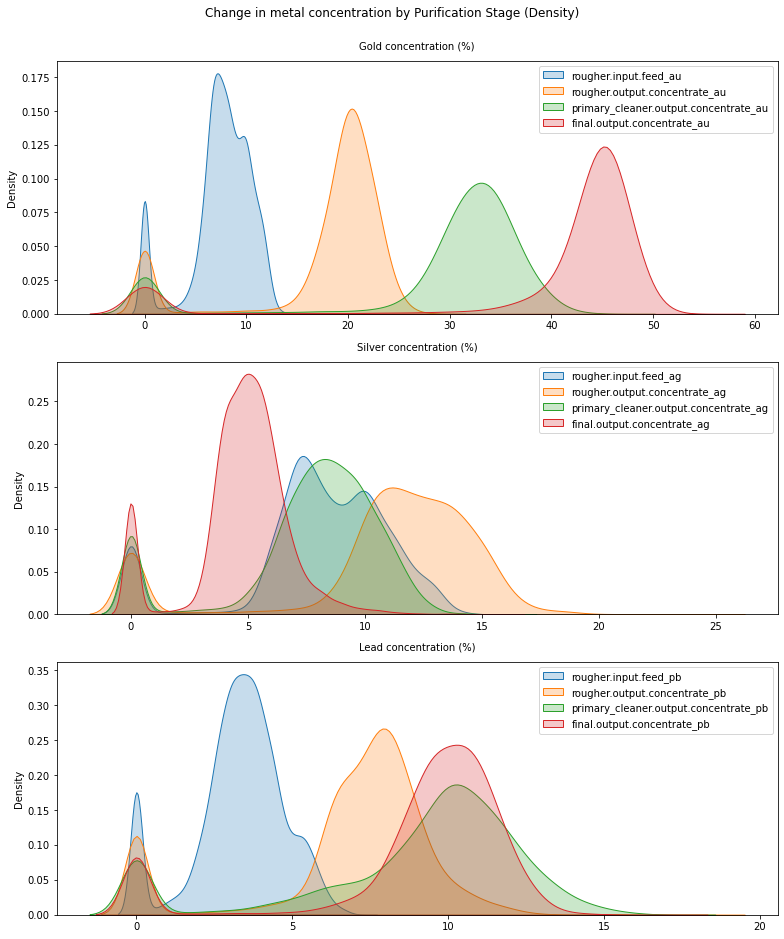

In [20]:
#Create subplots to visualize each metals concentration after each purification stage.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(11, 13), sharey=False)
fig.suptitle('Change in metal concentration by Purification Stage (Density)', y=1)

for i in metals.keys():
    for j in stages:
        ax = list(metals.keys()).index(i)
        sns.kdeplot(gold_recv_full[(j+i)], ax=axes[ax], shade='fill', label=(j+i))
        axes[ax].legend()
        axes[ax].set_xlabel(metals[i] + ' concentration (%)',labelpad = 12)
        axes[ax].xaxis.set_label_position('top')
        axes[ax].set_ylabel('Density')

plt.tight_layout()
plt.show()

<h4>Conclusions</h4>

* Gold: 
  * For each step of the purification process, the concentration increases 
  * The Density is the lowest on the primary cleaning stage, it is the highest on the first stage


* Silver: 
  * An interesting graph and distribution 
  * After flotation the concentration of silver increases
  * On the next stages( after foltation) concentration keep decreasig
  * The concentation of and the density on the initial ore mixture and the primary cleaning stage are very simialr
  * The density is the highest on the final stage the lowest after flotation, it is the opposite for the concentation 
  * The final stage result: the concentration of silver lower than the concentration in the initial ore mixture.


* Lead: 
  * The concentration of lead keep on increasing until the second stage of the cleaner process
  * The density keep on decreasing until the second stage of the cleaner process, on the final stage it increases
  * Final stage result: the concentation values are very similar to these on the previous stage 
  
  
* In general, we found:
  * The concentration values are the highest for the gold, lowest for the lead. 
  * The Density values are the highest for the lead, and the lowest for the gold.
  * The above may indicate that there is an inverse relationship between the Density and the Concentation attributes
  * There are unusual values for the concentation(zero 0), it may be due to lack of of the metal in the initial stage or some mistake on the data 
  

<h3>Feed Particle Size Distributions - train set vs test set</h3>

* In the following step we are going to examine the feed paticle size distribution for the both of the datasets: train and test
* We are going to use the scaled values(from 1.4.3) instead of the actual values
* Significant difference between the distributions it indicates that the model evaluation will be incorrect

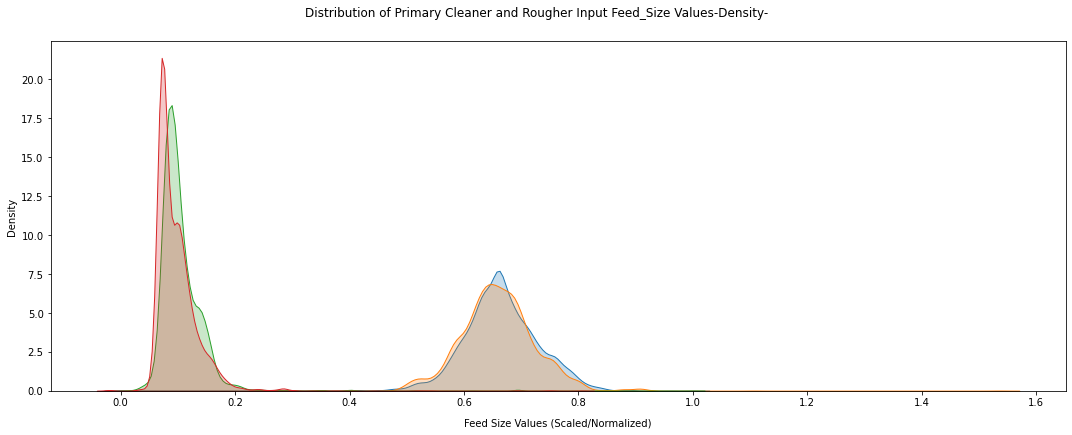

In [21]:
#plot to visualize the key feed_size value distributions for both of the datasets train & test
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Distribution of Primary Cleaner and Rougher Input Feed_Size Values-Density-', y=1)

sns.kdeplot(gold_train_scaled['primary_cleaner.input.feed_size'], shade='fill',label='Train - Primary Feed Size')
sns.kdeplot(gold_test_scaled['primary_cleaner.input.feed_size'], shade='fill',label='Test - Primary Feed Size')
sns.kdeplot(gold_train_scaled['rougher.input.feed_size'],shade='fill', label='Train - Rougher Feed Size')
sns.kdeplot(gold_test_scaled['rougher.input.feed_size'],shade='fill', label='Test - Rougher Feed Size')
plt.xlabel('Feed Size Values (Scaled/Normalized)', labelpad = 10)
plt.ylabel('Density')
    
plt.tight_layout()
plt.show()

<h4>Conclusions</h4>

* The distribution of the particle size look very similar on the cleaning stage for both of the sets 
* On the initial stage the distributions differ slightly for the sets, but the difference absolutely can not be considered as significant
* as a result of the above we can proceed to the model evaluation with no worries about incoorect evaluation

<h3>Consider the total concentrations of all substances at different stages</h3>

* In the following step we will be examing the total concentations of all the substances(metals) at each stage 
* We will present the results on one graph using kdeplot method 
* We are going to use a method that will return the total concentation according to a step 

In [22]:
# a function to get total concentration of all metals at certain stages
def total_concentr_metals(df, stage):
    metal_handles = list(metals.keys())
    total_concentr = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_concentr

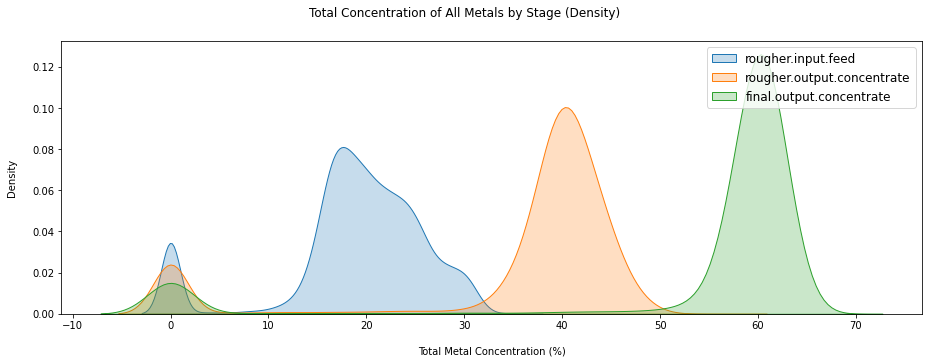

In [23]:
#Create plot to visualize total concentration of all metals at certain stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density)', y=1)

sns.kdeplot(total_concentr_metals(gold_recv_full, 'rougher.input.feed'), label='rougher.input.feed', shade='fill')
sns.kdeplot(total_concentr_metals(gold_recv_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', shade='fill')
sns.kdeplot(total_concentr_metals(gold_recv_full, 'final.output.concentrate'), label='final.output.concentrate', shade='fill')
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', labelpad = 15)
plt.ylabel('Density', labelpad=15)

plt.tight_layout()
plt.show()

<h4>Conclusions</h4>

* On each stage the concentation keep increasing 
* we can see that the total concentration of the metals is the highest on the final stage, lowst on the inital stage 
* The distribution of the concentration is narrow on the final stage compared to the distribution of the first stage 
* We can see here that for all the metals together, the correlation between the concentation and the density is positive rather than inverse one
* We can see that there are unusal part on the graph around the zero, in the previous steps we explained the reason behind it 
* It is better to remove those values before the model evaluation step 
  * for all the satges, we can see that the initial value are greater or equal to 10
  * Thus 10 will be the limit

<h4>Remove irregular values</h4>

* Removing the unusual values first on the original dataframe the full_gold 
* Next we will remove unusual values on the train and test set, by checking if the date exist on the full dataframe

In [24]:
gold_full_no_irregular = gold_recv_full.loc[(gold_recv_full[['rougher.input.feed_au', 'rougher.input.feed_pb', \
                                               'rougher.input.feed_ag']].sum(axis=1) > 10) \
                                  & (gold_recv_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', \
                                                 'rougher.output.concentrate_ag']].sum(axis=1) > 10) \
                                  & (gold_recv_full[['final.output.concentrate_au', 'final.output.concentrate_pb', \
                                                'final.output.concentrate_ag']].sum(axis=1) > 10)]

In [25]:
gold_train_scaled = gold_train_scaled.loc[gold_train_scaled['date'].isin(gold_full_no_irregular['date'])].reset_index(drop=True)
gold_test_scaled = gold_test_scaled.loc[gold_test_scaled['date'].isin(gold_full_no_irregular['date'])].reset_index(drop=True)

<h4>Examine New Distribution</h4>

* We will take a look of the graph without the irregular values

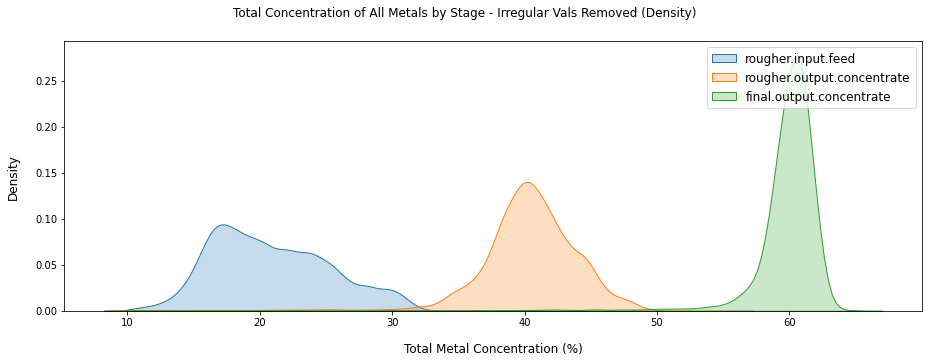

In [26]:
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage - Irregular Vals Removed (Density)', y=1)

sns.kdeplot(total_concentr_metals(gold_full_no_irregular, 'rougher.input.feed'), label='rougher.input.feed', shade='fill')
sns.kdeplot(total_concentr_metals(gold_full_no_irregular, 'rougher.output.concentrate'), label='rougher.output.concentrate', shade='fill')
sns.kdeplot(total_concentr_metals(gold_full_no_irregular, 'final.output.concentrate'), label='final.output.concentrate', shade='fill')
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

**Graph without irregualr value is a nicer graph and a healthy one**

<h2>Build The Model</h2>

* In this section we are going to build models train them and compare the results 
* We will score them according to the sMape parameter 

<h3>Functions to Calculate sMAPE & Final sMAPE</h3>

* According to the documentation we are:
  * Creating a method to calculate the sMape 
  * Creating a method to calculate the final sMape 

In [27]:
#a function to calculate sMAPE
def smape(target_true, target_pred):
    smape = np.mean(abs(target_pred - target_true) / ((abs(target_true) + abs(target_pred)) / 2)) * 100
    return smape

#a function to calculate final sMAPE
def f_smape(target_true, target_pred):
    predicted_rough, predicted_final = target_pred[:, 0],target_pred[:, 1]
    true_rough, true_final = target_true[:, 0], target_true[:, 1]
    f_smape = (0.25 * (smape(true_rough, predicted_rough))) + (0.75 * (smape(true_final, predicted_final)))
    return f_smape

<h3>Split into target and features sets</h3>

* Splitting each one of the datasets to two subsets: features and target 
* In order to evaluate models it is mandatory to do so

In [28]:
target = ['rougher.output.recovery', 'final.output.recovery']
features = [x for x in gold_train_scaled if x not in target and x != 'date']

#Split training and testing datasets by features and targets.
target_train, target_test = gold_train_scaled[target].values, gold_test_scaled[target].values
features_train, features_test = gold_train_scaled[features].values, gold_test_scaled[features].values

<h3>Train Different Models</h3>

* Before building the models we are going to create a method to evaluate the model and return its score, using:
  * The methods we created above 
  * Cross validation method
* Our data is numerical thus obviously we are going to use regression models

In [29]:
scorer = make_scorer(f_smape, greater_is_better=False)
def cross_val(model):
    res_scores = cross_val_score(model,features_train, target_train,scoring=scorer, cv=5)
    res_scores = abs(res_scores)
    return res_scores

<h4>Linear Regression Model</h4>

In [30]:
model_linear = LinearRegression()
scores_linear = (cross_val(model_linear)).round(2)
print(scores_linear)
print('Mean of the scores - model Linear regression',statistics.mean(scores_linear).round(2))

[11.94  8.98  9.08  7.8  11.89]
Mean of the scores - model Linear regression 9.94


<h4>Random Forest Regressor Model</h4>

In [31]:
model_forest = RandomForestRegressor(random_state=12345, n_estimators = 10)
scores_forest = (cross_val(model_forest)).round(2)
print(scores_forest)
print('Mean of the scores - model Random Forest regressor',statistics.mean(scores_forest).round(2))

[ 9.46 13.21  7.7   9.78 10.87]
Mean of the scores - model Random Forest regressor 10.2


<h4>Decision Tree Regressor Model</h4>

In [32]:
depth_range = range(2, 6, 1)
best_scores_tree = []
for i in depth_range:
    model_tree = DecisionTreeRegressor(random_state=12345,max_depth=i)
    scores_tree = min((cross_val(model_tree)).round(2))
    best_scores_tree.append(scores_tree)
print(best_scores_tree)
print('Mean of the scores - model Decision Tree regressor',statistics.mean(best_scores_tree).round(2))

[8.34, 8.71, 7.92, 8.08]
Mean of the scores - model Decision Tree regressor 8.26


<h4>K-Neighbors Regressor Model</h4>

In [33]:
neighbor_range = range(2, 11, 2)
best_scores_KNN = []
for i in neighbor_range:
    model_KNNeighbors  = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores_KNN = min((cross_val(model_KNNeighbors)).round(2))
    best_scores_KNN.append(scores_KNN)
print(best_scores_KNN)
print('Mean of the scores - model K-Neighbors regressor',(statistics.mean(best_scores_KNN).round(2)))

[9.45, 8.97, 8.75, 8.6, 8.49]
Mean of the scores - model K-Neighbors regressor 8.85


<h4>Conclusions</h4>

* Linear regressor and random forest return approximately the same scores
* Decision tree model has the lowest model among the other models
* Random forest got the min sMAPE across all the models, yet its mean value is the highest
* KNN got a good mean and its values range is more narrow than this of the decision tree, in the other hand the mean is higher than the mean of the decision tree 
  * Note, the running time of the KNN model is high 
* Our parameter to choose the best model is  the mean value, thus we are going to choose the Decision tree model as the best one 

<h3>Test The Best Model</h3>

* As mentioned above it ppears that the best model according to the performance with our scorer method is the Decision Tree Regression model
* In the following step we will test the model with our test set

In [34]:
model_tree = DecisionTreeRegressor(random_state=12345,max_depth=3).fit(features_train, target_train)
predicted_test = model_tree.predict(features_test)
score_tree_test = f_smape(target_test, predicted_test);
print(score_tree_test)

7.302425067342831


* with max_depth = 4 we got a greater value, on the other hand with max_depth=3 we got a smaller one
* with max_depth=3 the sMAPE score for the test datasets is better than the score for the training one 
* the score result equal to 7.302, it can be considered as a good value  
* We need to compare this result to the sanity model result, in order to ensure that it is good enough 

<h3>The Sanity Model</h3>

* The sanity model will be containing the test target set and the mean of target set oof the training set

In [35]:
#creating the sanity check data, mean of the target columns of the training set
len_test = len(target_test)
train_avg_rougher = ([gold_train_scaled['rougher.output.recovery'].mean()]*len_test)
train_avg_final = ([gold_train_scaled['final.output.recovery'].mean()]*len_test)
target_sanity =  np.column_stack((train_avg_rougher, train_avg_final))

In [36]:
# the target set is the target test set, and the predicted is the mean of the train set we created above 
predicted_sanity =  f_smape(target_test, target_sanity)
print(predicted_sanity.round(2))

7.54


**The sanity  model's score is a little higher than our best model's score** 

* No significant difference, yet still can be concluded that the model we chose as the best one is indeed the right one

<h2>Conclusions</h2>

* In the first section we examine and process the dataset, we found:
   * The dataset is very large, a total of 22716 entries
   * The train dataset and the full dataset got the same number of columns 
   * On the other hand the test dataset got smalller number of columns (missing columns) 
   * Recovery calculation was calculated correctly:
     * We got mean of 9.44 which indicates an insignificant difference between the actual values and the predicted values. 
   * No duplicated entries on our datasets 
   * High percentage of  NaN values:
      * 24.8% on the training set 
      * 10.71% on the test set
  * Scaling values of the datasets in order to give equivalent weight for all the values
  * Using Iterative imputing we fill nan values. 
  * Remaining NaN values were removed and that's due to the size of the dataset
     * Keeping these value wpuld result in incoorect model evaluation 
     * Large dataset will not be affected significantly by removing 10% of it's entries
     
     
* In the second section we analyze the dataset values, we found: 

   * Subsection -  The concentrations of metals depenfing on purification stage:
        * Highest concentation value is for the gold, lowest for the lead. 
        * Highest Density value id for the lead, and the lowest for the gold.
        * There are unusual values for the concentation(zero 0), it may be due to lack of of the metal in the initial stage or some mistake on the data 
        
   * Subsection -The feed particle size distribution in the train and test sets:
       *  On the cleaning stage the results look very similar for both of the sets 
       *  On the initial stage there is insignificant difference between the results
       
   * Subsection - Consider the total concentrations of all substances at different stages
      *  On each stage the concentation keep increasing 
      *  The total concentration of the metals is the highest on the final stage, lowst on the inital stage 
      *  For all the satges, we can see that the initial value are greater or equal to 10
      * Removing all of he values less than 10 
      * By removing outliers we got a nicer graph and a healthy one



* In the third section we evaluate different models, we found: 
    * Decision tree model has the lowest model among the other models
    * Random forest got the min sMAPE across all the models, yet its mean value is the highest
    * We chose the decision tree model as the best one due to it's low mean value 
    * Testing the model with the test set, result with a lower score value 
    * The sanity  model's score is a little higher than our best model's score